# Math Frameworks

In image processing, we often work with images in the spatial domain, which is the realm of individual pixels. However, sometimes it's more helpful to switch to the frequency domain, where we look at how quickly colors change in the image. Transitions, like edges, show up as high-frequency components, while smoother areas are low-frequency. Mathematical tools like Laplace and Fourier transforms, Z-transform, cosine transform, and wavelet transform help us switch from spatial to frequency domain, making some tasks, like detecting edges or smoothing images, easier and more efficient.

## Import Modules

In [1]:
from PIL import Image, ImageEnhance, ImageDraw
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.ndimage

## Load Images

In [2]:
noodles_rgb = Image.open("data/processed/palabok.png")
dumplings_rgb = Image.open("data/processed/dumplings.png")
pancake_rgb = Image.open("data/processed/pancake.png")

noodles = noodles_rgb.convert('L')
dumplings = dumplings_rgb.convert('L')
pancake = pancake_rgb.convert('L')

noodles_np = np.array(noodles)
dumplings_np = np.array(dumplings)
pancake_np = np.array(pancake)

## Laplacian Transform

![Image](https://cdn1.byjus.com/wp-content/uploads/2020/01/Laplace-Transform-1.png)

The Laplacian transform is a mathematical operation used for edge detection in images.
The Laplacian filters provided in your example code are commonly used discrete approximations of the Laplacian filter.

1. `laplacian_filter_edge`: This filter emphasizes edges by assigning negative weights to the surrounding pixels and a positive weight to the center pixel. It detects edges by accentuating the differences in intensity between adjacent pixels.
2. `laplacian_filter_sharpen`: This filter is also known as a sharpening filter. It enhances image details and edges by assigning negative weights to the surrounding pixels and a higher positive weight to the center pixel. It amplifies the high-frequency components in the image, making edges and fine details more prominent.
3. `laplacian_filter_smooth`: This filter has a smoothing effect on the image. It assigns positive weights to all surrounding pixels and a negative weight to the center pixel. This filter reduces noise and blurs the image by averaging the intensities of neighboring pixels, resulting in a smoother appearance.

These filters can be applied to an image by convolving them with the image using techniques such as the discrete convolution operation. The output of the convolution highlights the edges or changes in intensity within the image based on the characteristics of the specific Laplacian filter used.


* https://www.l3harrisgeospatial.com/docs/laplacianfilters.html
* Two commonly used discrete approximations to the Laplacian filter based on [this paper](https://www.researchgate.net/figure/Two-commonly-used-discrete-approximations-to-the-Laplacian-filter_fig1_261459927)

In [3]:
laplacian_filter_edge = np.array([[0, -1, 0],
                                 [-1, 4, -1],
                                 [0, -1, 0]])

laplacian_filter_sharpen = np.array([[-1, -1, -1],
                                     [-1, 8, -1],
                                     [-1, -1, -1]])

laplacian_filter_smooth = np.array([[1, 1, 1],
                                    [1, -8, 1],
                                    [1, 1, 1]])

The convolution operation between noodles_np (the image) and laplacian_filter_edge (the filter) can be understood as a dot product between the image and the filter.

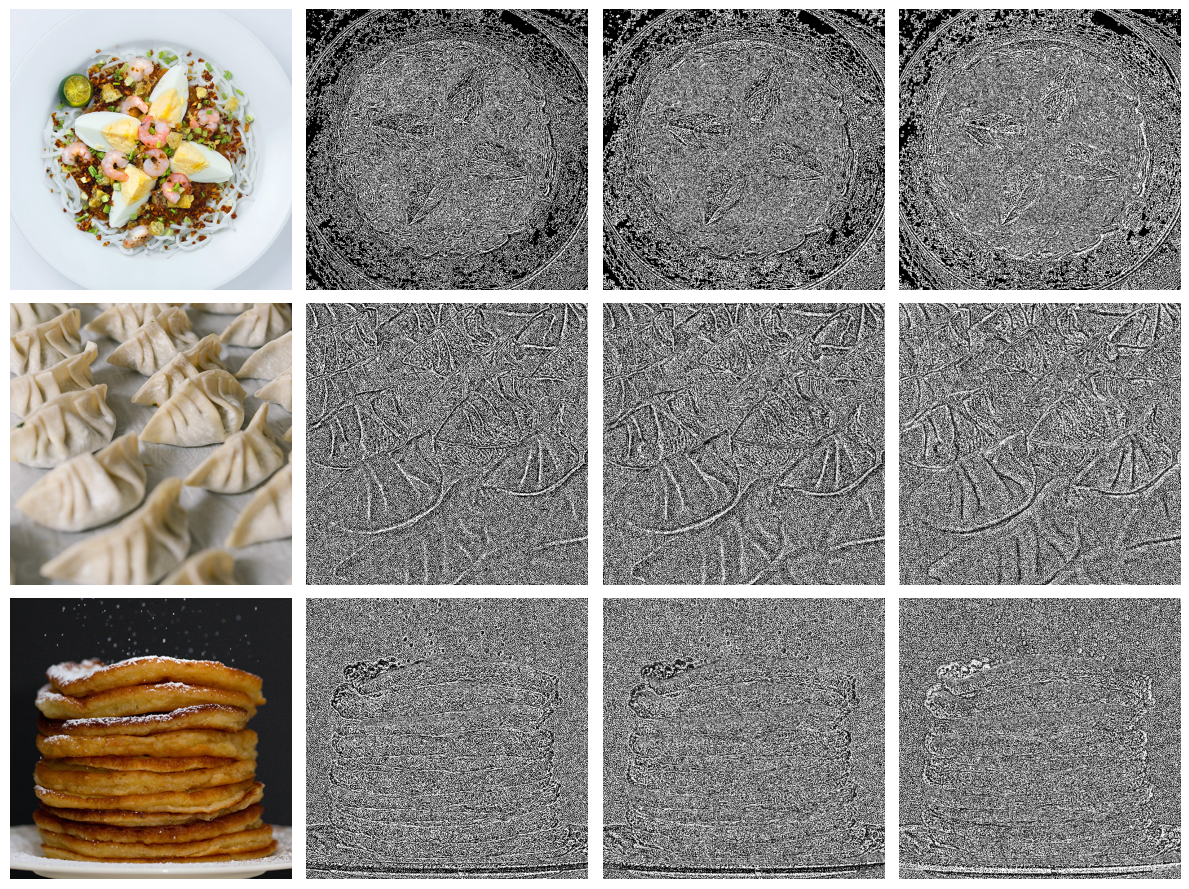

In [4]:
noodles_lf_edge = scipy.ndimage.convolve(noodles_np, laplacian_filter_edge)
noodles_lf_edge = Image.fromarray(noodles_lf_edge)
noodles_lf_sharp = scipy.ndimage.convolve(noodles_np, laplacian_filter_sharpen)
noodles_lf_sharp = Image.fromarray(noodles_lf_sharp)
noodles_lf_smooth = scipy.ndimage.convolve(noodles_np, laplacian_filter_smooth)
noodles_lf_smooth = Image.fromarray(noodles_lf_smooth)

dumplings_lf_edge = scipy.ndimage.convolve(dumplings_np, laplacian_filter_edge)
dumplings_lf_edge = Image.fromarray(dumplings_lf_edge)
dumplings_lf_sharp = scipy.ndimage.convolve(dumplings_np, laplacian_filter_sharpen)
dumplings_lf_sharp = Image.fromarray(dumplings_lf_sharp)
dumplings_lf_smooth = scipy.ndimage.convolve(dumplings_np, laplacian_filter_smooth)
dumplings_lf_smooth = Image.fromarray(dumplings_lf_smooth)

pancake_lf_edge = scipy.ndimage.convolve(pancake_np, laplacian_filter_edge)
pancake_lf_edge = Image.fromarray(pancake_lf_edge)
pancake_lf_sharp = scipy.ndimage.convolve(pancake_np, laplacian_filter_sharpen)
pancake_lf_sharp = Image.fromarray(pancake_lf_sharp)
pancake_lf_smooth = scipy.ndimage.convolve(pancake_np, laplacian_filter_smooth)
pancake_lf_smooth = Image.fromarray(pancake_lf_smooth)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes[0,0].imshow(noodles_rgb)
axes[0,1].imshow(noodles_lf_edge, cmap="gray")
axes[0,2].imshow(noodles_lf_sharp, cmap="gray")
axes[0,3].imshow(noodles_lf_smooth, cmap="gray")
axes[1,0].imshow(dumplings_rgb)
axes[1,1].imshow(dumplings_lf_edge, cmap="gray")
axes[1,2].imshow(dumplings_lf_sharp, cmap="gray")
axes[1,3].imshow(dumplings_lf_smooth, cmap="gray")
axes[2,0].imshow(pancake_rgb)
axes[2,1].imshow(pancake_lf_edge, cmap="gray")
axes[2,2].imshow(pancake_lf_sharp, cmap="gray")
axes[2,3].imshow(pancake_lf_smooth, cmap="gray")

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

## Fourier Transform

Fourier Transform tells us about frequency pattern that may not be obvious in the spatial domain.

* `np.fft.fft2()` computes the Z-Transform. `np.fft.ifft2()` is used for reversing the transformation.
* `np.fft.fftshift()` shifts the zero-frequency component to the center of the spectrum, making it easier to see the low frequencies (major features) in the middle of the image. `np.fft.ifftshift()` is used for reversing the transformation.
   * The bright spots away from the center in the frequency domain image represent high-frequency components. In the context of an image, high frequencies often correspond to rapid changes in intensity in the spatial domain. In the image below, the dumplings show high frequency changes possibly due to its fine detail (folds and flour)


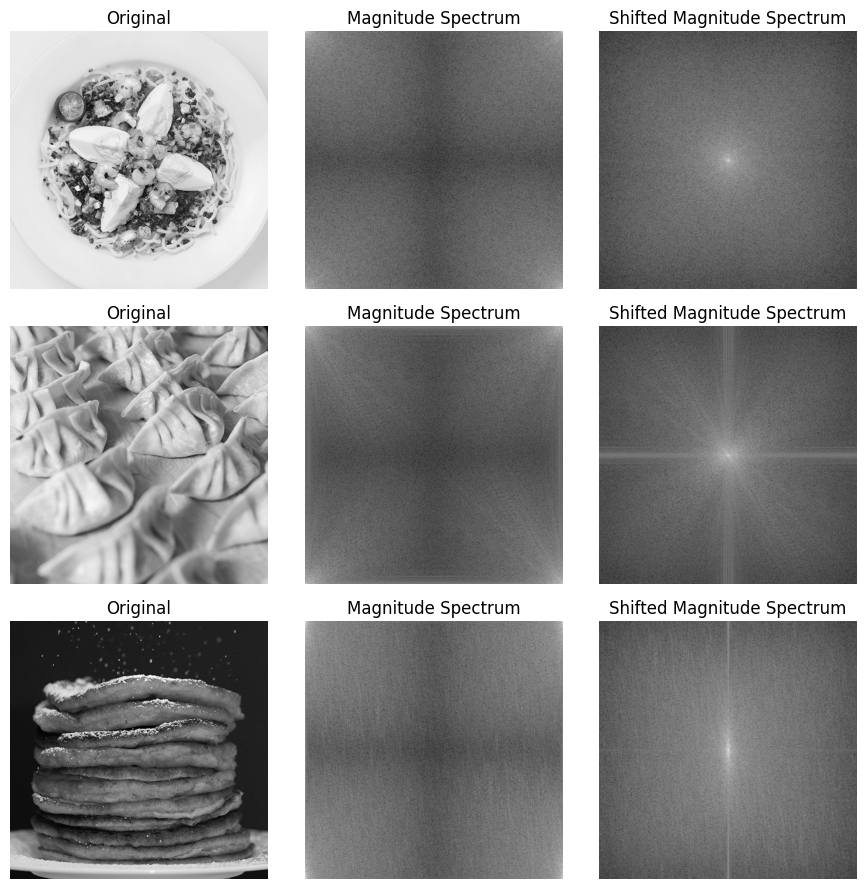

In [5]:
#Computes the Z Transform
noodles_fft2 = np.fft.fft2(noodles_np)
dumplings_fft2 = np.fft.fft2(dumplings_np)
pancake_fft2 = np.fft.fft2(pancake_np)

#Shifts the Z Transform
noodles_fftshift = np.fft.fftshift(noodles_fft2)
dumplings_fftshift = np.fft.fftshift(dumplings_fft2)
pancake_fftshift = np.fft.fftshift(pancake_fft2)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes[0,0].set_title("Original")
axes[0,0].imshow(noodles_np, cmap='gray')
axes[0,1].set_title("Magnitude Spectrum")
axes[0,1].imshow(np.log(1 + np.abs(noodles_fft2)), cmap="gray")
axes[0,2].set_title("Shifted Magnitude Spectrum")
axes[0,2].imshow(np.log(1 + np.abs(noodles_fftshift)), cmap="gray")

axes[1,0].set_title("Original")
axes[1,0].imshow(dumplings_np, cmap='gray')
axes[1,1].set_title("Magnitude Spectrum")
axes[1,1].imshow(np.log(1 + np.abs(dumplings_fft2)), cmap="gray")
axes[1,2].set_title("Shifted Magnitude Spectrum")
axes[1,2].imshow(np.log(1 + np.abs(dumplings_fftshift)), cmap="gray")

axes[2,0].set_title("Original")
axes[2,0].imshow(pancake_np, cmap='gray')
axes[2,1].set_title("Magnitude Spectrum")
axes[2,1].imshow(np.log(1 + np.abs(pancake_fft2)), cmap="gray")
axes[2,2].set_title("Shifted Magnitude Spectrum")
axes[2,2].imshow(np.log(1 + np.abs(pancake_fftshift)), cmap="gray")

for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

High frequencies correspond to fine details and edges in an image, as they represent rapid changes in intensity. If fine grain details are important in image processing, high frequency can be useful for extracting features. On the other hand, high frequencies can also correspond to noise, such as sensor noise or JPEG compression artifacts. If you're trying to clean up an image or reduce noise, you might consider high frequencies as undesirable and attempt to filter them out.

Low frequencies correspond to slower changes in intensity or larger structures. They represent the overall shapes and colors in the image. If you're interested in the general composition of an image rather than its details, then low frequencies are important. For instance, recognizing a face doesn't require knowing every single pore, it requires recognizing the overall shape and features, which are represented in the low frequencies. In some cases, low frequencies can also correspond to unwanted elements like motion blur or lighting gradients, in which case you might want to remove them.